

You are given the Dubai Properties - Apartments dataset. You tasks are:
- Create an Artificial Neural Network (ANN) model that can predict the price of an apartment based on its given properties.

- You need to clean and preprocess the data as needed.
- Create a custom Dataset class to efficiently load and prepare the data.

- Clearly define the architecture of your ANN model, specifying the number of layers, neurons, and activation functions.
- Make two version of your model with different number of layers and hidden neurons
- Train the model on the prepared data and evaluate its performance on a separate validation set.
- Track the training loss during training and plot it to visualize the learning process.

- Print some sample predictions from the trained model to demonstrate its capabilities.



 Dataset:
 https://www.kaggle.com/datasets/dataregress/dubai-properties-dataset/data

In [113]:
import pandas as pd

In [114]:
import os
from google.colab import drive

In [115]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
df=pd.read_csv("/content/drive/MyDrive/properties_data.csv")
df

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,...,False,True,True,True,True,True,True,True,True,True
1901,7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,...,False,False,True,True,False,False,False,False,True,True
1902,7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,...,False,False,False,True,False,False,False,False,False,False
1903,7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,Medium,...,False,True,True,True,False,False,False,False,True,True


In [138]:
df.shape

(1905, 38)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [140]:
df.duplicated().sum()

0

In [141]:
df.isnull().sum()

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

In [142]:
# convert catecorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['neighborhood'] = label_encoder.fit_transform(df['neighborhood'])
df['quality'] = label_encoder.fit_transform(df['quality'])

In [143]:
df = df.astype(int)

In [145]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [146]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, df):
        self.data = df
        self.labels = self.data['price'].values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Retrieve the data and label at the given index
        row = self.data.iloc[index]
        x = torch.Tensor(row.drop('price').values)  # Exclude the 'price' column
        y = torch.Tensor([self.labels[index]])  # Wrap the label in a tensor

        return x, y

In [147]:
train_dataset = CustomDataset(train_df)
test_dataset = CustomDataset(test_df)

train_labels = train_dataset.labels
test_labels = test_dataset.labels

In [148]:
train_labels

array([1200000, 5500000, 2450000, ...,  650000, 1499998,  620720])

In [149]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [150]:
train_loader,test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7e88c8f698a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e88c8f6a230>)

In [151]:
import torch
import torch.nn as nn

class linearRegression(nn.Module):
    def __init__(self,input_dim):
        super(linearRegression,self).__init__()
        self.fc1=nn.Linear(input_dim,10)
        self.fc2=nn.Linear(10,5)
        self.fc3=nn.Linear(5,3)
        self.fc4=nn.Linear(3,1)

    def forward(self,d):
        out=torch.relu(self.fc1(d))
        out=torch.relu(self.fc2(out))
        out=torch.relu(self.fc3(out))
        out=self.fc4(out)
        return out



In [152]:
first_batch = next(iter(train_loader))
input_features = first_batch[0]
input_dim = input_features.shape[1]
print(input_dim)
torch.manual_seed(42)
model = linearRegression(input_dim)

37


In [153]:
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learning_rate = 0.001
num_epochs = 5
batch_size=32

model=linearRegression(input_dim).to(device)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/5], Average Loss: 12826442850304.0000
Epoch [2/5], Average Loss: 12124583226026.6660
Epoch [3/5], Average Loss: 10833295866538.6660
Epoch [4/5], Average Loss: 9256548065280.0000
Epoch [5/5], Average Loss: 8680572310869.3330


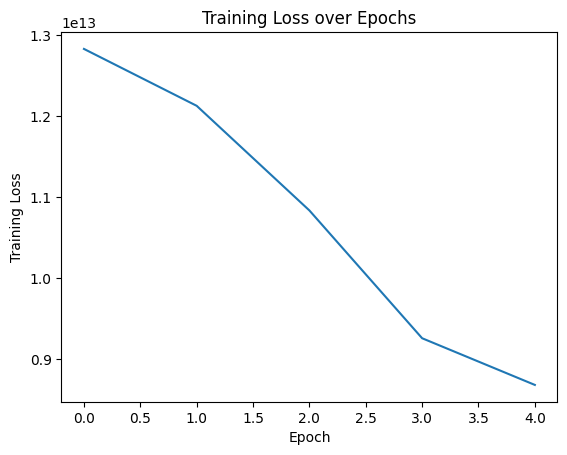

In [154]:
import torch
import matplotlib.pyplot as plt


train_losses = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}")

plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [134]:
import torch

model.to(device)

model.eval()

total_loss = 0.0
total_samples = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        total_loss += loss.item() * inputs.size(0)
        total_samples += inputs.size(0)

average_loss = total_loss / total_samples
print(f"Average Loss on Test Set: {average_loss:.4f}")

Average Loss on Test Set: 8144868097144.9453


In [156]:
import torch

model.eval()
sample_predictions = []
with torch.no_grad():
    num_samples = 5
    for i, (inputs, targets) in enumerate(test_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        predictions = outputs.cpu().numpy()
        targets = targets.cpu().numpy()
        sample_predictions.append((predictions[0], targets[0]))
        if i+1 == num_samples:
            break

for i, (prediction, target) in enumerate(sample_predictions):
    print(f"Sample {i+1}: Prediction = {prediction}, Target = {target}")

Sample 1: Prediction = [2105650.8], Target = [720000.]
Sample 2: Prediction = [2111373.2], Target = [900000.]
Sample 3: Prediction = [2061799.8], Target = [1050888.]
Sample 4: Prediction = [2099054.2], Target = [1266000.]
Sample 5: Prediction = [2093162.1], Target = [610577.]


# another version

In [157]:
class linearRegression(nn.Module):
    def __init__(self,input_dim):
        super(linearRegression,self).__init__()
        self.fc1=nn.Linear(input_dim,64)
        self.fc2=nn.Linear(64,32)
        self.fc3=nn.Linear(32,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,32)
        self.fc6=nn.Linear(32,1)



    def forward(self,d):
        out=torch.relu(self.fc1(d))
        out=torch.relu(self.fc2(out))
        out=torch.relu(self.fc3(out))
        out=torch.relu(self.fc4(out))
        out=torch.relu(self.fc5(out))
        out=self.fc6(out)
        return out


In [158]:
first_batch = next(iter(train_loader))
input_features = first_batch[0]
input_dim = input_features.shape[1]
print(input_dim)
torch.manual_seed(42)
model = linearRegression(input_dim)

37


In [159]:
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learning_rate = 0.001
num_epochs = 5
batch_size=32

model=linearRegression(input_dim).to(device)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/5], Average Loss: 10743389383338.6660
Epoch [2/5], Average Loss: 8650306719744.0000
Epoch [3/5], Average Loss: 8548170863957.3330
Epoch [4/5], Average Loss: 8535335224661.3330
Epoch [5/5], Average Loss: 8947965941077.3340


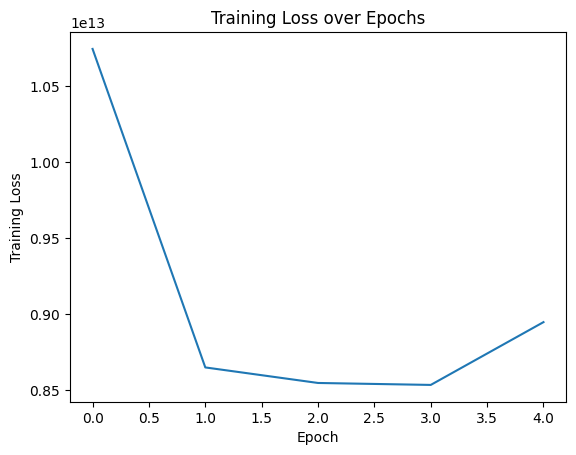

In [160]:
import torch
import matplotlib.pyplot as plt


train_losses = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}")

plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [161]:
import torch

model.eval()
sample_predictions = []
with torch.no_grad():
    num_samples = 5
    for i, (inputs, targets) in enumerate(test_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        predictions = outputs.cpu().numpy()
        targets = targets.cpu().numpy()
        sample_predictions.append((predictions[0], targets[0]))
        if i+1 == num_samples:
            break

for i, (prediction, target) in enumerate(sample_predictions):
    print(f"Sample {i+1}: Prediction = {prediction}, Target = {target}")

Sample 1: Prediction = [2253568.2], Target = [720000.]
Sample 2: Prediction = [2259694.2], Target = [900000.]
Sample 3: Prediction = [2206707.5], Target = [1050888.]
Sample 4: Prediction = [2246632.2], Target = [1266000.]
Sample 5: Prediction = [2240143.2], Target = [610577.]
